In [1]:
from monster.import_data import *
from monster.features_extraction import *
from monster.scaling_and_clustering import *
from monster.scoring import *
from monster.export_output import *

%load_ext autoreload
%autoreload 2

# Create output directory

In [2]:
## Create output directory
feature_calculation_and_scaling_results, clustering_and_CLUMPs, MOnSTER_score_path, MOnSTER_analysis = create_output_directory_MOnSTER(
'MOnSTER_results')

folder exists
folder exists
folder exists
folder exists
folder exists


# Data

In [3]:
seqs_path_pos = '../data/datasets/minc_nr_positive_dataset.fasta'
seqs_path_neg = '../data/datasets/minc_nr_negative_dataset.fasta'
motifs_path = '../data/lst_motifs'

## Import data
pos_dict = import_fasta_sequences_as_dict(seqs_path_pos)
neg_dict = import_fasta_sequences_as_dict(seqs_path_neg)
lst_motifs = import_list_motifs(motifs_path)

# Features calculation

In [4]:
## Convert list of motifs to dictionary
dict_motifs = from_lst_to_dict(lst_motifs)

## The function 
df_motifs_features = feature_calculation(dict_motifs)
pos_dset_feat = feature_calculation(pos_dict)
neg_dset_feat = feature_calculation(neg_dict)

In [5]:
# storing results into folder feature_calculation_and_scaling_results
save_df_to_directory(df_motifs_features, 'df_motifs_features', feature_calculation_and_scaling_results)
save_df_to_directory(pos_dset_feat, 'pos_dset_feat', feature_calculation_and_scaling_results)
save_df_to_directory(neg_dset_feat, 'neg_dset_feat', feature_calculation_and_scaling_results)

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/feature_calculation_and_scaling/df_motifs_features.tsv
/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/feature_calculation_and_scaling/pos_dset_feat.tsv
/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/feature_calculation_and_scaling/neg_dset_feat.tsv


## Data scaling

In [6]:
## Standard scaling (0)
## The funcion 
df_motifs_scl = features_data_scaling(df_motifs_features, 0)

In [7]:
# storing results into folder feature_calculation_and_scaling_results
save_df_to_directory(df_motifs_scl, 'df_motifs_scl', feature_calculation_and_scaling_results)

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/feature_calculation_and_scaling/df_motifs_scl.tsv


# Clustering

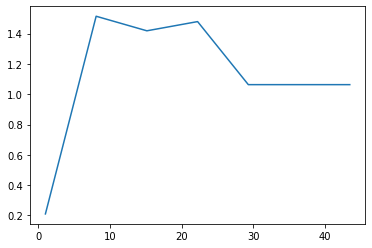

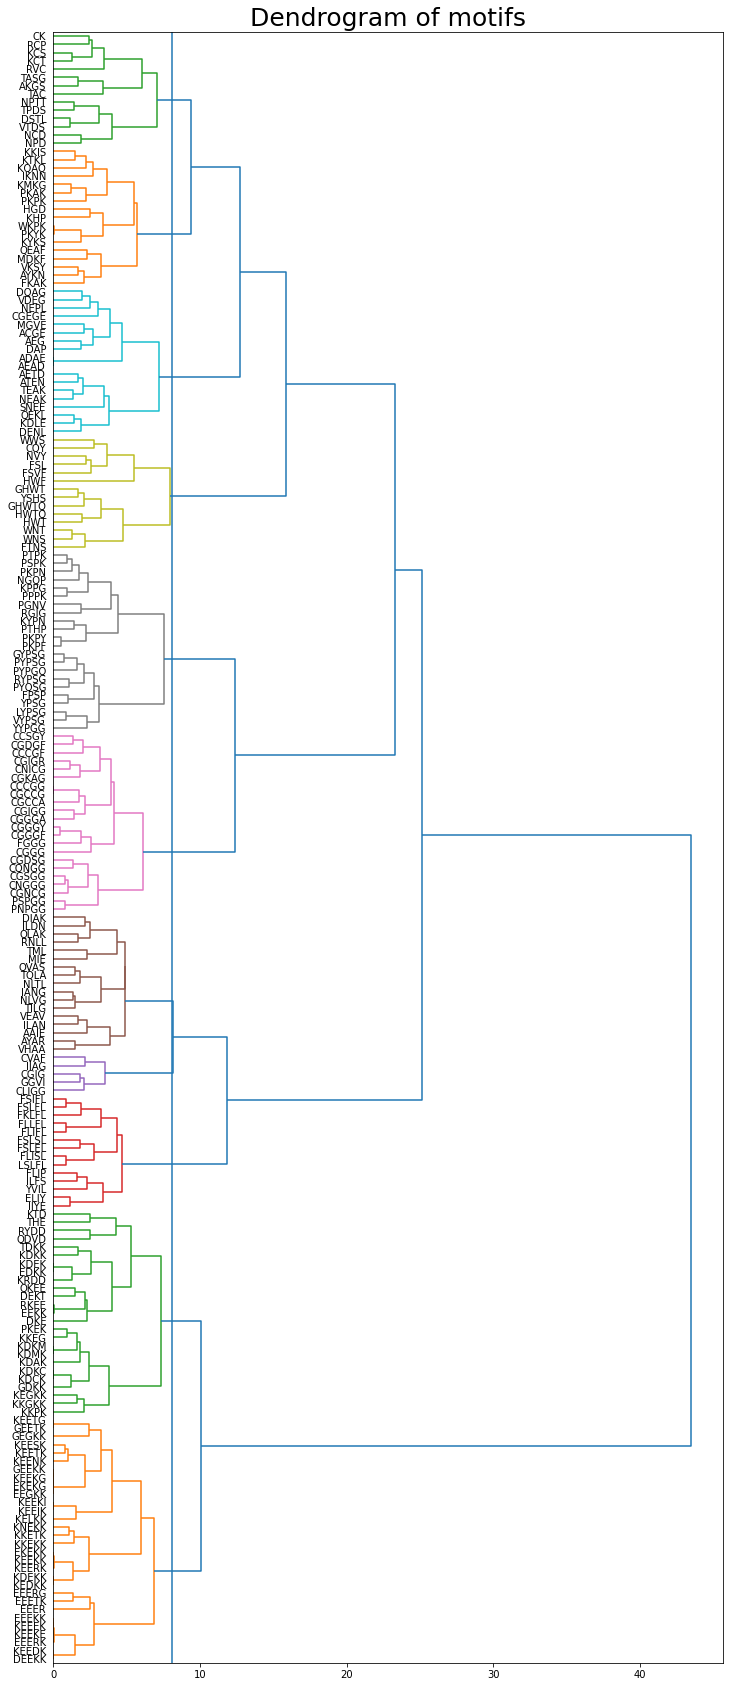

In [8]:
### clustering
#
link_matrix, best_distance, dict_davies_bouldin_results, df_motifs_CLUMPs, dendogram, newick_tree = motif_clustering(
clustering_and_CLUMPs, df_motifs_scl, 7)

In [9]:
best_distance

8.076395891294393

In [10]:
newick_tree

'(((((((((((CK:2.45,RCP:2.45):0.19,(KCS:1.30,KCT:1.30):1.34):0.84,RVC:3.48):2.56,((TASG:1.68,AKGS:1.68):1.71,TAC:3.39):2.66):1.03,(((NPTT:1.43,TPDS:1.43):1.67,(DSTL:1.12,VTDS:1.12):1.97):0.90,(NCD:1.93,NPD:1.93):2.07):3.08):2.32,((((((KKIS:1.49,KTKL:1.49):0.76,KQAQ:2.25):0.48,IKNN:2.73):0.98,((KMKG:1.20,PKAK:1.20):1.02,PKPK:2.22):1.49):1.81,((HGD:2.54,KHP:2.54):0.87,((WKPK:0.05,PKYK:0.05):1.85,KYKS:1.90):1.51):2.10):0.17,((QEAF:2.30,MDKF:2.30):0.95,((VKSY:1.67,AYKN:1.67):0.45,FKAK:2.12):1.13):2.44):3.70):3.33,((((((DQAG:2.00,VDEG:2.00):0.54,NEPL:2.54):0.54,CGEGE:3.08):0.79,((MGVE:2.10,ACGE:2.10):0.59,(AEG:1.94,DAP:1.94):0.76):1.18):0.85,(ADAE:0.00,AEAD:0.00):4.72):2.50,((((AETD:1.73,ATEN:1.73):0.29,(TEAK:1.39,NEAK:1.39):0.63):1.44,SNEE:3.46):0.35,((QEKL:1.43,KDLE:1.43):0.48,DENL:1.91):1.90):3.40):5.50):3.16,((((WWS:2.79,CQY:2.79):0.87,((NVY:2.24,FSL:2.24):0.36,FSVF:2.60):1.06):1.87,HWF:5.53):2.46,((((GHWT:1.69,YSHS:1.69):0.43,GHWTQ:2.12):1.14,(HWTQ:1.99,HWT:1.99):1.27):1.52,((WNT:1.30,

In [11]:
dict_davies_bouldin_results

{1.0: 0.210199267110065,
 8.076395891294393: 1.5146386389763642,
 15.152791782588785: 1.4185740677921845,
 22.229187673883178: 1.4793360734150443,
 29.30558356517757: 1.0632666580419619,
 36.38197945647197: 1.0632666580419619,
 43.458375347766356: 1.0632666580419619}

In [12]:
df_motifs_CLUMPs

,motif,CLUMP
0,CGGGF,0
1,PKPK,1
2,KDMK,2
3,RCP,3
4,PKYK,1
...,...,...
193,PKPY,8
194,KELKK,7
195,QEKL,5
196,CGSGG,0


In [13]:
# storing results into folder clustering_and_CLUMPs
save_df_to_directory(df_motifs_CLUMPs, 'df_motifs_CLUMPs', clustering_and_CLUMPs) # a df for all the CLUMPs
save_lsts_motifs(df_motifs_CLUMPs, clustering_and_CLUMPs) # a df per CLUMP

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/clustering_and_CLUMPs/df_motifs_CLUMPs.tsv


# Scoring

In [14]:
## format data
df_all_motifs_all_features, pos_dset_feat, neg_dset_feat = format_input_data(df_motifs_features, df_motifs_CLUMPs,
    pos_dset_feat, neg_dset_feat)

In [15]:
## find occurrences of non redundant motifs
#
df_general, df_start_end_position_pos, df_start_end_position_neg = find_occurrences_of_mots_in_datasets(
    df_motifs_CLUMPs, pos_dict, neg_dict)
lst_motifs_mask, motifs_counts, df_cnt_seq_per_cluster = find_occ_and_nb_seqs(df_motifs_CLUMPs, df_general)

In [16]:
df_start_end_position_pos

,motif,CLUMP,seq_id,start,end,dataset
0,CGGGF,0,Minc3s00086g04105,85,90,positive
1,PKPK,1,Minc3s00083g03979,138,142,positive
2,PKPK,1,Minc3s00141g05855,58,62,positive
3,PKPK,1,Minc3s00485g13130,74,78,positive
4,PKPK,1,Minc3s00724g16553,259,263,positive
...,...,...,...,...,...,...
1256,QEKL,5,Minc03328,141,145,positive
1257,CGSGG,0,Minc3s00465g12805,135,140,positive
1258,CGSGG,0,Minc3s01509g24368,135,140,positive
1259,CGSGG,0,Minc3s04123g35534,135,140,positive


In [17]:
# storing results into folder MOnSTER_score
save_df_to_directory(df_start_end_position_pos, 'df_start_end_position_pos', MOnSTER_analysis)
save_df_to_directory(df_start_end_position_neg, 'df_start_end_position_neg', MOnSTER_analysis)

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/MOnSTER_analysis/df_start_end_position_pos.tsv
/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/MOnSTER_analysis/df_start_end_position_neg.tsv


In [18]:
# storing results into folder MOnSTER_score
MOnSTER_score_results, df_sign_features_p_values = MOnSTER_score(
    pos_dset_feat, neg_dset_feat, motifs_counts, df_cnt_seq_per_cluster,
    df_motifs_CLUMPs, df_all_motifs_all_features)
MOnSTER_score_results

the number of candidate features is: 13
the number of significant features is: 6
significant features to calculate the CLUMP_score are: ['tiny', 'gravy', 'sheet', 'turn', 'helix', 'aliphatic']


,CLUMP,monster_score,ranking
0,0,1.734102,2
1,1,1.207414,5
2,2,1.660625,4
3,3,1.001868,8
4,4,0.699243,11
5,5,0.953441,10
6,6,1.161629,6
7,7,1.695624,3
8,8,1.840307,1
9,9,0.967500,9


In [19]:
df_sign_features_p_values

,0
tiny,1.262430e-02
gravy,1.945994e-03
sheet,4.339739e-06
turn,2.590003e-06
helix,2.768976e-08
aliphatic,2.287084e-15


In [20]:
# storing results into folder MOnSTER_score
save_df_to_directory(df_sign_features_p_values, 'df_sign_features_p_values', MOnSTER_score_path)

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/MOnSTER_score/df_sign_features_p_values.tsv


In [21]:
# summary of results
df_summary_results_monster = final_results_table(MOnSTER_score_results, df_motifs_CLUMPs, df_cnt_seq_per_cluster)
save_df_to_directory(df_summary_results_monster, 'df_summary_results_monster', MOnSTER_score_path)

/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/demo/MOnSTER_results/MOnSTER_score/df_summary_results_monster.tsv


In [22]:
df_summary_results_monster

,CLUMP,monster_score,# motifs,occurrences_pos_dset %,occurrences_neg_dset %
8,8,1.840307,22,0.310559,0.020202
0,0,1.734102,22,0.248447,0.020202
7,7,1.695624,30,0.173913,0.040404
2,2,1.660625,25,0.472050,0.220202
1,1,1.207414,17,0.360248,0.060606
6,6,1.161629,14,0.335404,0.145455
10,10,1.115165,5,0.142857,0.016162
3,3,1.001868,14,0.590062,0.420202
9,9,0.967500,14,0.273292,0.010101
5,5,0.953441,18,0.354037,0.133333
